# 1 step: Data Preprocessing

In [7]:
import pandas as pd

file_path = "creditcard.csv" 
data = pd.read_csv(file_path)

print("Первые 5 строк набора данных:")
print(data.head())

Первые 5 строк набора данных:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

  

In [8]:
print("\nОбщая информация о наборе данных:")
print(data.info())


Общая информация о наборе данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     28480

In [9]:
print(f"\nРазмеры набора данных: {data.shape}")


Размеры набора данных: (284807, 31)


In [10]:
print("\nПроверка пропущенных значений в наборе данных:")
print(data.isnull().sum())


Проверка пропущенных значений в наборе данных:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [11]:
print("\nКоличество дублированных строк в наборе данных:", data.duplicated().sum())


Количество дублированных строк в наборе данных: 1081


In [13]:
from sklearn.preprocessing import StandardScaler

# Масштабирование признака `Amount`
scaler = StandardScaler()
data['Amount'] = scaler.fit_transform(data[['Amount']])

# Проверка результатов масштабирования
print("\nПервые 5 строк после масштабирования признака `Amount`:")
print(data[['Amount']].head())


Первые 5 строк после масштабирования признака `Amount`:
     Amount
0  0.244964
1 -0.342475
2  1.160686
3  0.140534
4 -0.073403


In [17]:
# Проверка распределения классов
print("\nРаспределение классов в исходном наборе данных:")
print(data['Class'].value_counts())


Распределение классов в исходном наборе данных:
Class
0    284315
1       492
Name: count, dtype: int64


In [19]:
# Удаление строк с пропущенными значениями
data_cleaned = data.dropna()

# Удаление дублированных строк
data_cleaned = data_cleaned.drop_duplicates()

# Проверка новых размеров набора данных после очистки
print(f"Размеры набора данных после очистки: {data_cleaned.shape}")

# Проверка распределения классов после очистки
print("\nРаспределение классов в очищенном наборе данных:")
print(data_cleaned['Class'].value_counts())

Размеры набора данных после очистки: (283726, 31)

Распределение классов в очищенном наборе данных:
Class
0    283253
1       473
Name: count, dtype: int64


In [21]:
from sklearn.utils import resample
import numpy as np

# Разделение данных на две группы: легальные и мошеннические транзакции
legitimate = data_cleaned[data_cleaned['Class'] == 0]
fraudulent = data_cleaned[data_cleaned['Class'] == 1]

# Уменьшение числа легальных транзакций до размера мошеннических (undersampling)
legitimate_downsampled = resample(legitimate,
                                  replace=False,  # без замены
                                  n_samples=len(fraudulent),  # размер выборки равен количеству мошеннических транзакций
                                  random_state=42)

# Соединение уменьшенных легальных транзакций с мошенническими
data_balanced = pd.concat([legitimate_downsampled, fraudulent])

# Проверка нового распределения классов
print("\nРаспределение классов в сбалансированном наборе данных:")
print(data_balanced['Class'].value_counts())

# Новые размеры набора данных
print(f"Размеры набора данных после балансировки: {data_balanced.shape}")


Распределение классов в сбалансированном наборе данных:
Class
0    473
1    473
Name: count, dtype: int64
Размеры набора данных после балансировки: (946, 31)


# 2 step: Data Exploration and Visualization (EDA)

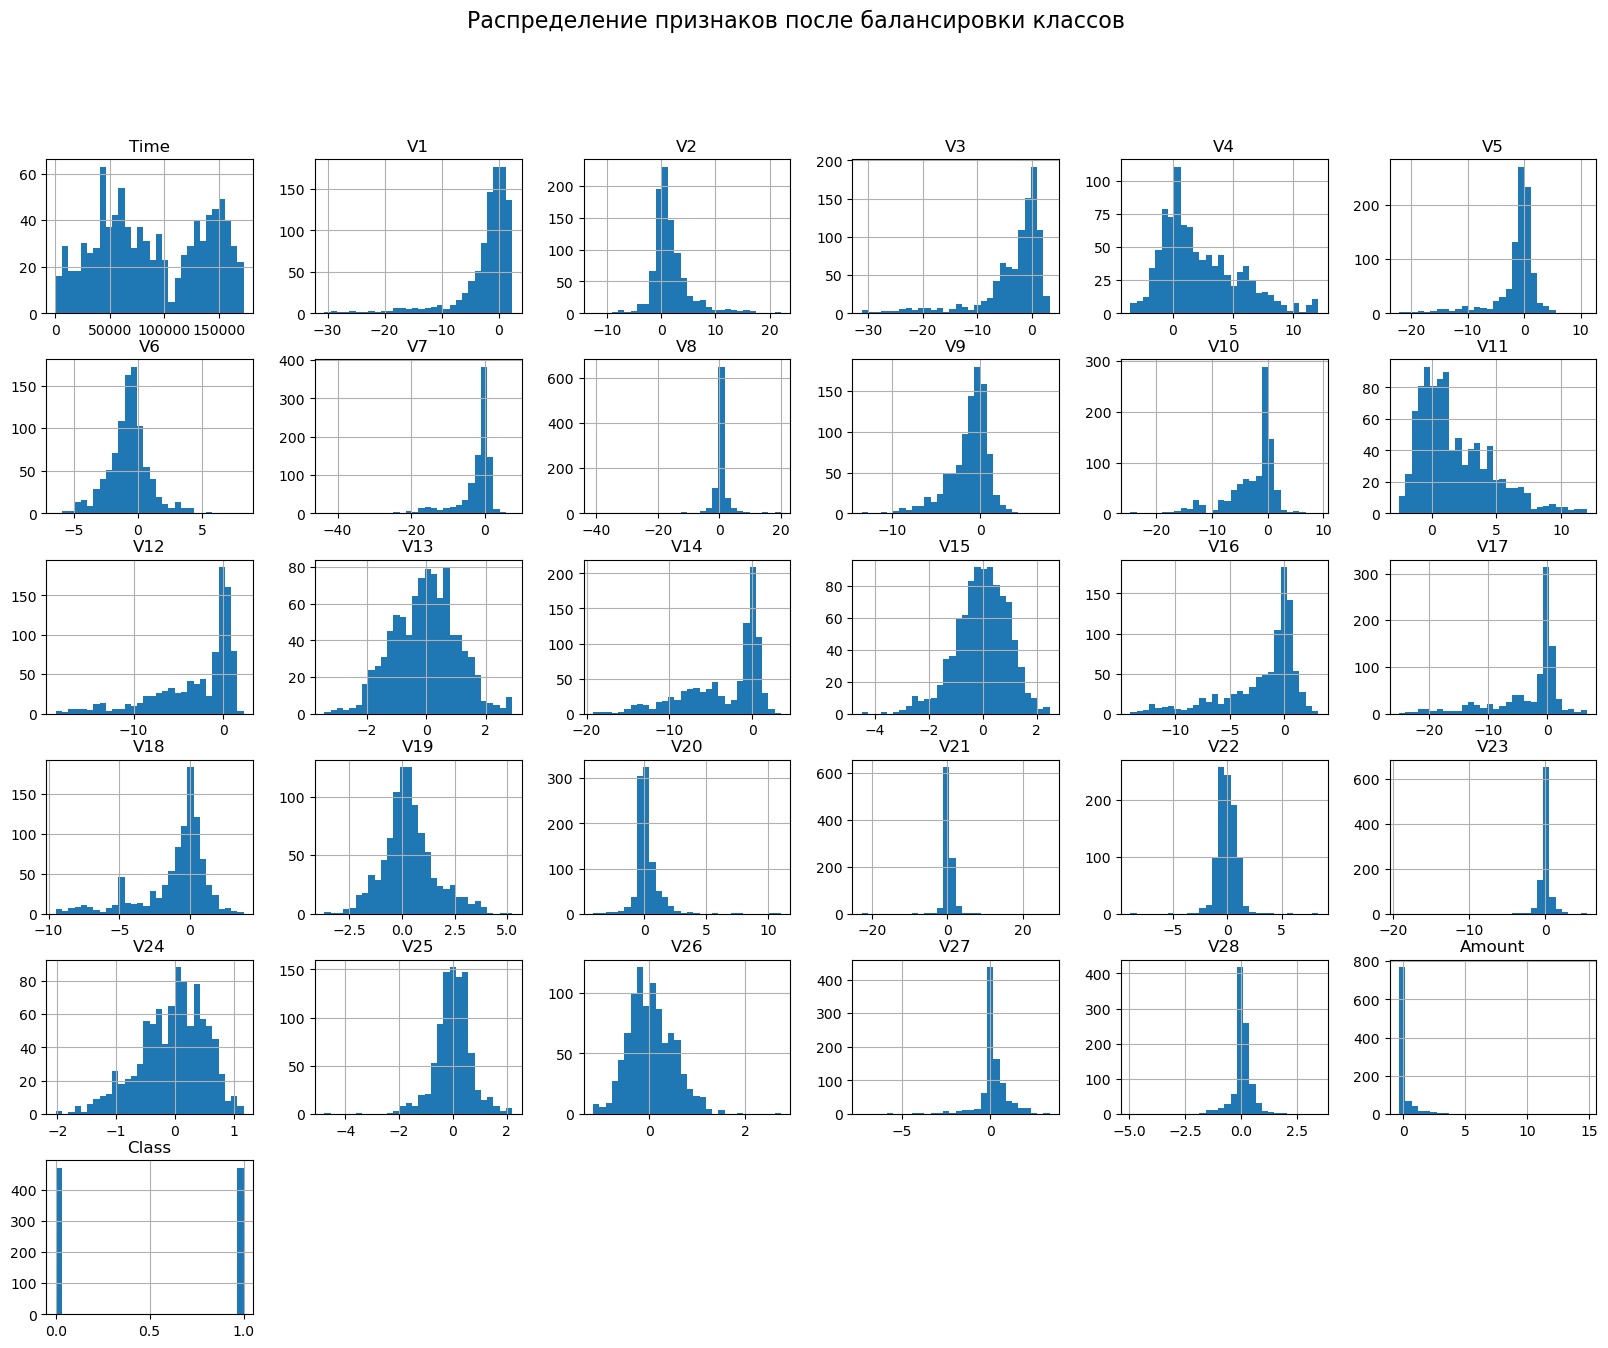

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns


# Гистограммы распределения признаков для сбалансированных данных
data_balanced.hist(bins=30, figsize=(20, 15))
plt.suptitle("Распределение признаков после балансировки классов", fontsize=16)
plt.show()

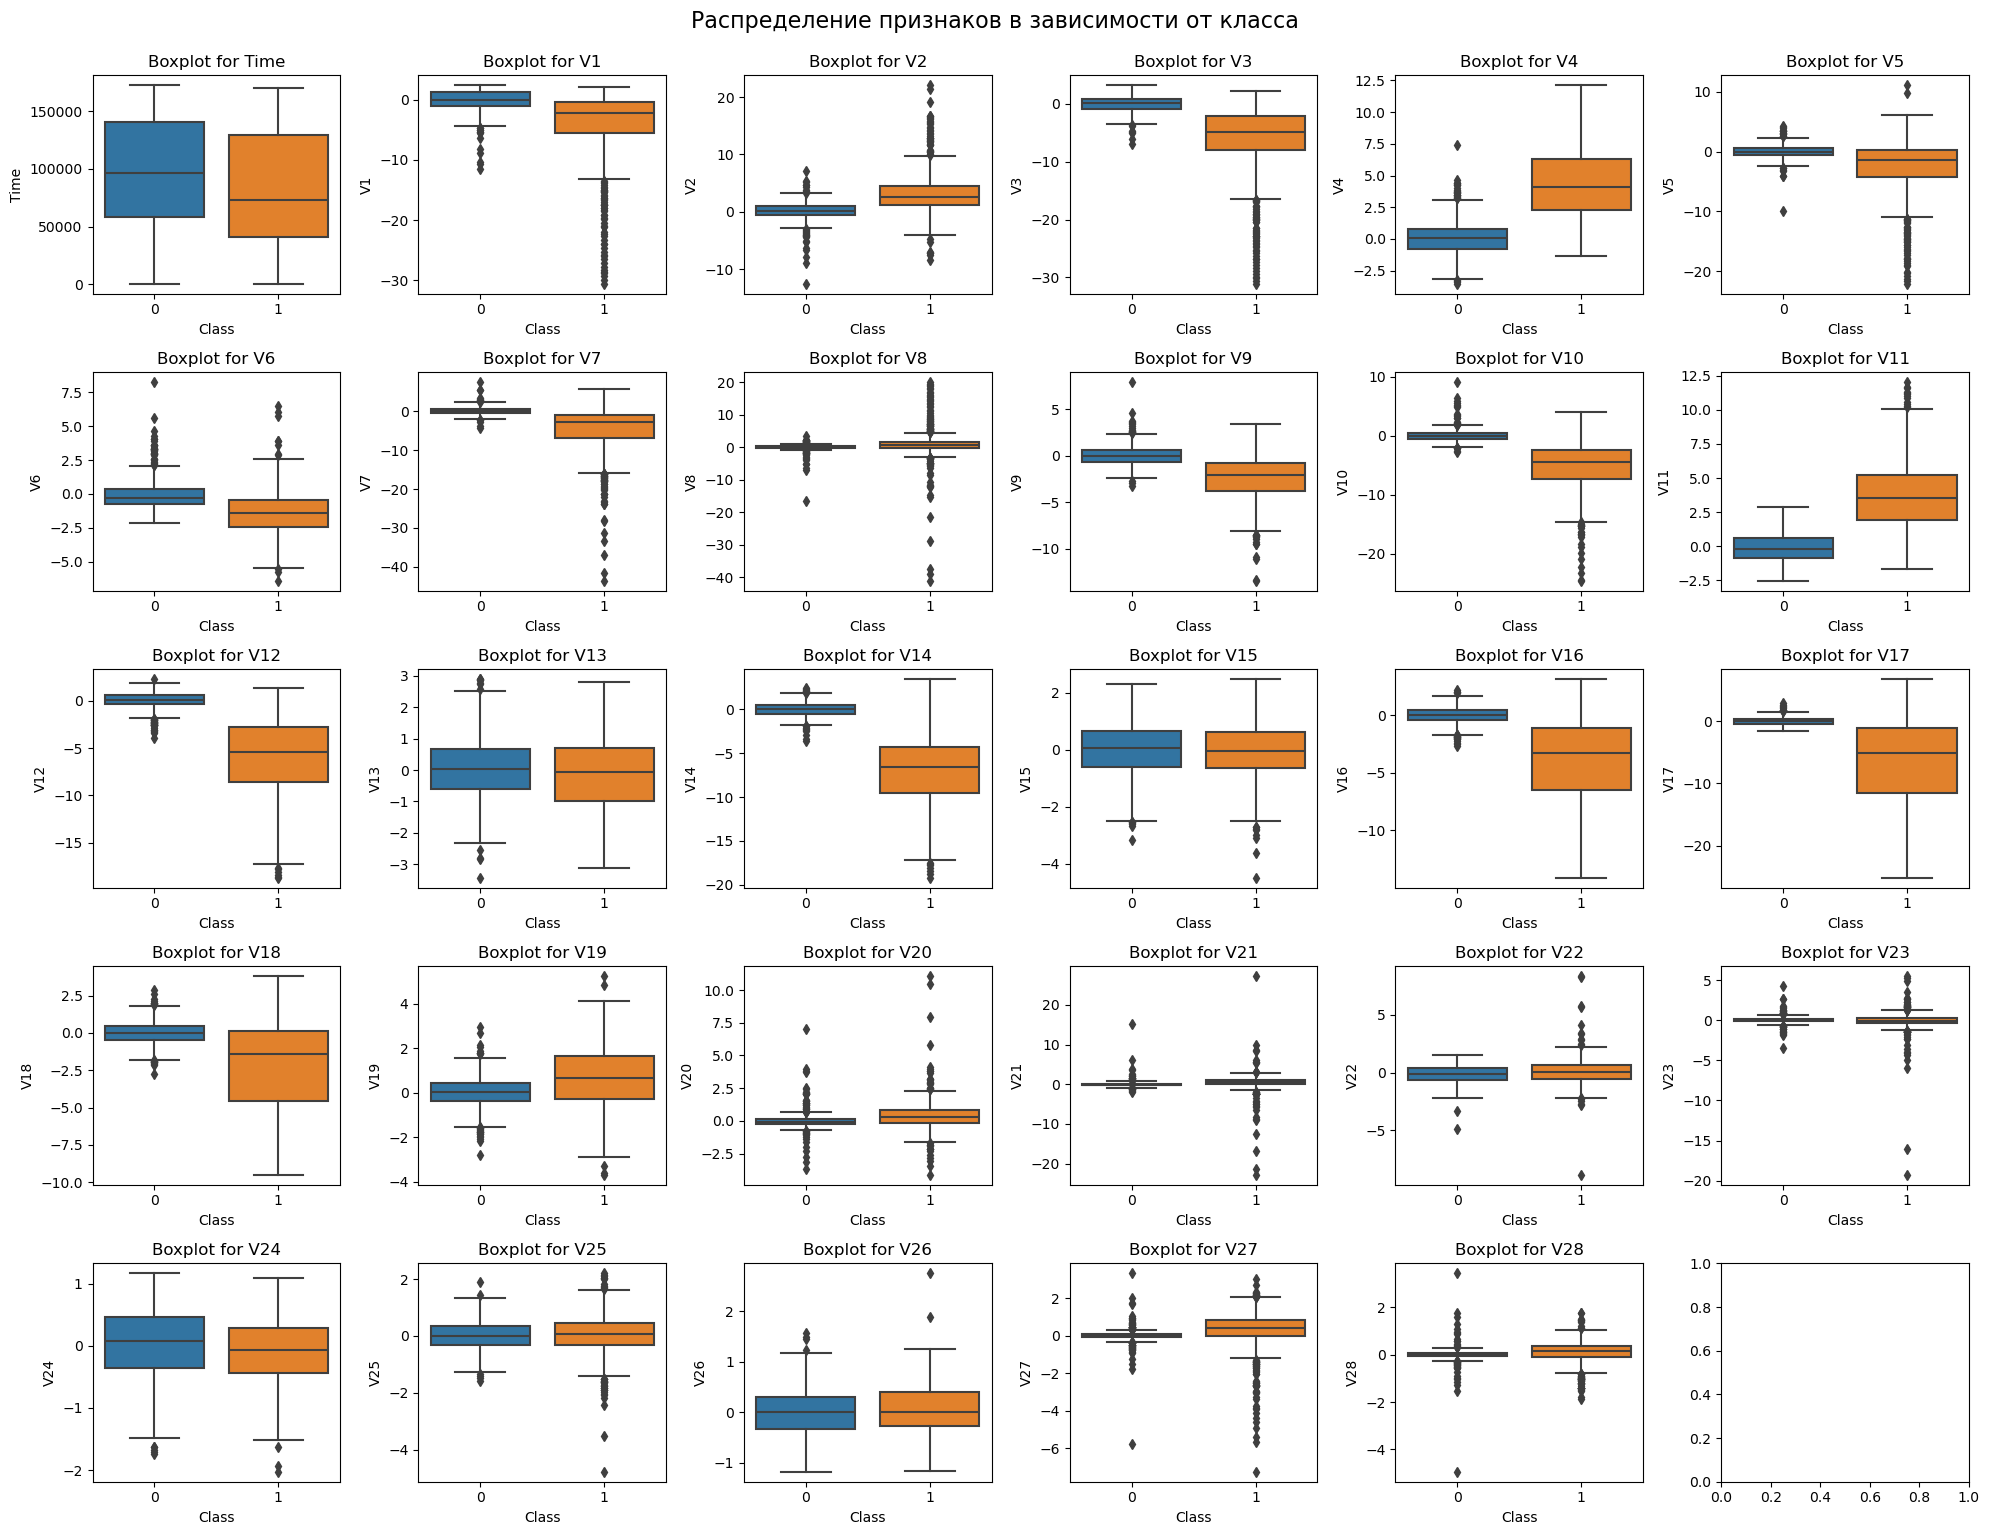

In [27]:
# Обновленная сетка подграфиков с достаточным количеством ячеек
fig, ax = plt.subplots(5, 6, figsize=(20, 15))  # 5 строк и 6 столбцов = 30 подграфиков
ax = ax.flatten()  # Преобразуем в одномерный массив

# Построение boxplot для каждого признака
for i, col in enumerate(data_balanced.columns[:-2]):  # Последние два столбца — Amount и Class
    sns.boxplot(x='Class', y=col, data=data_balanced, ax=ax[i])
    ax[i].set_title(f'Boxplot for {col}')

# Оформление диаграммы
plt.tight_layout()
plt.suptitle("Распределение признаков в зависимости от класса", fontsize=16, y=1.02)
plt.show()

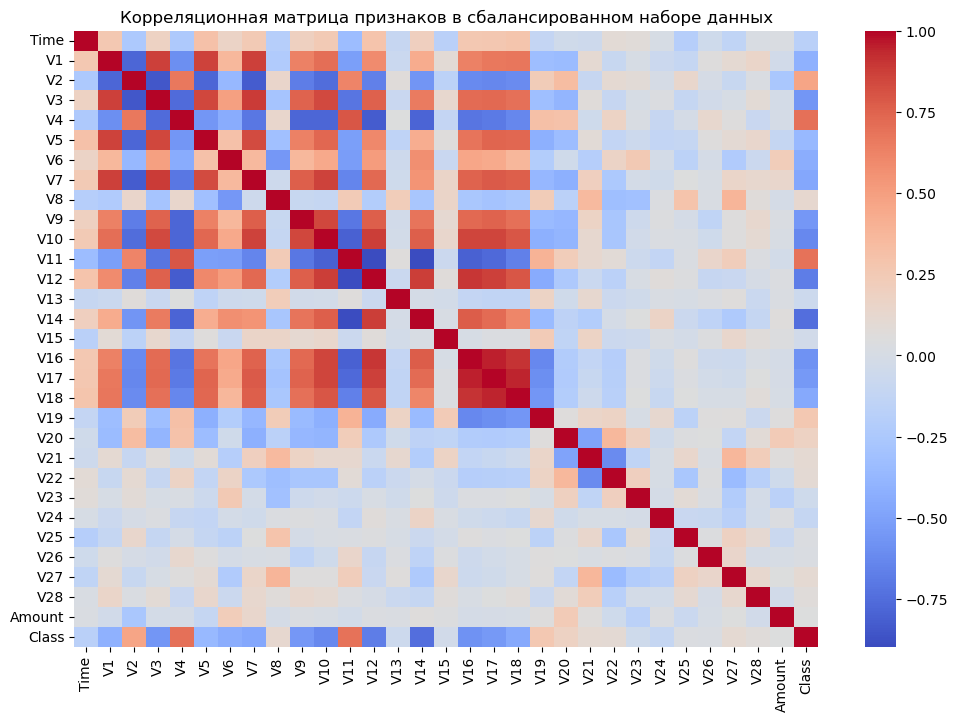

In [28]:
# Построение корреляционной матрицы
plt.figure(figsize=(12, 8))
corr_matrix = data_balanced.corr()  # Корреляционная матрица для сбалансированных данных

# Визуализация корреляционной матрицы с помощью heatmap
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title("Корреляционная матрица признаков в сбалансированном наборе данных")
plt.show()

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na opti

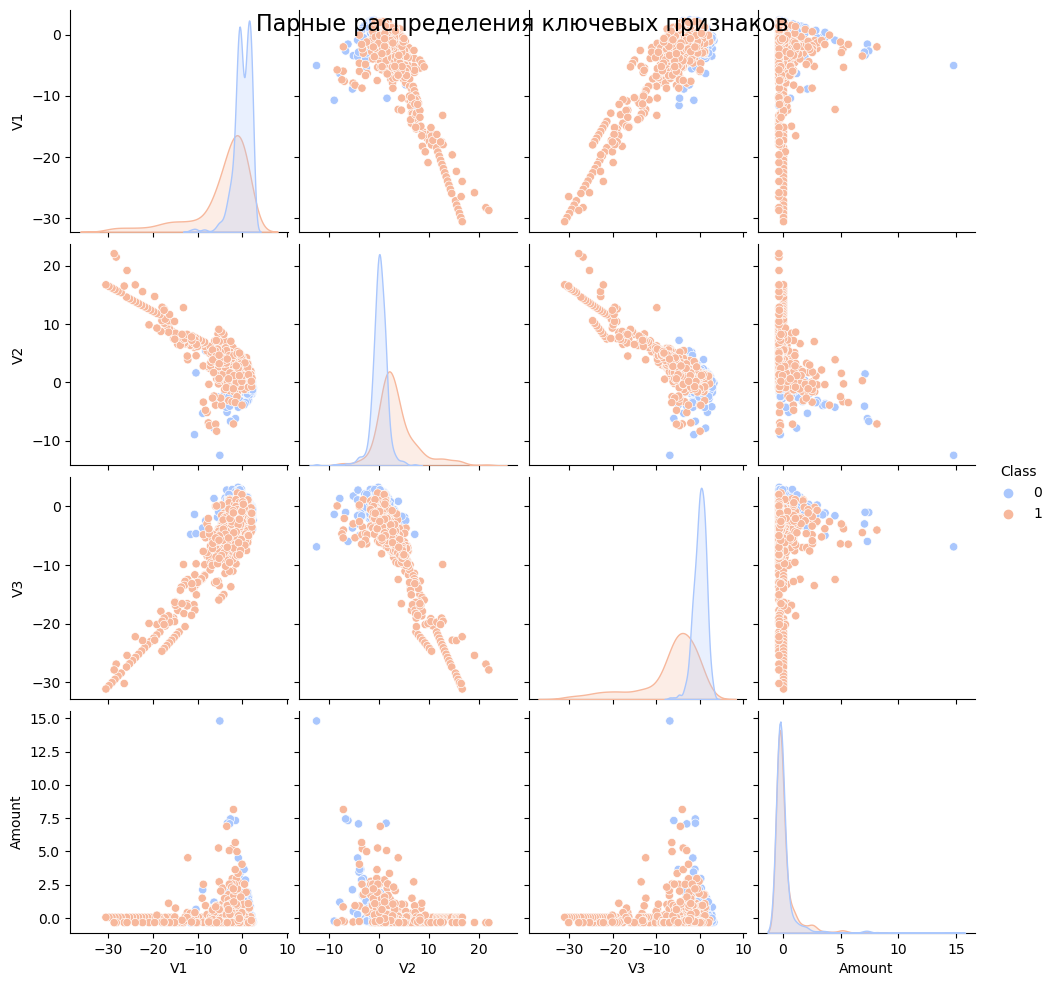

In [29]:
# Визуализация зависимостей между признаками с учетом класса
sns.pairplot(data_balanced, vars=['V1', 'V2', 'V3', 'Amount'], hue='Class', palette='coolwarm')
plt.suptitle("Парные распределения ключевых признаков", fontsize=16)
plt.show()

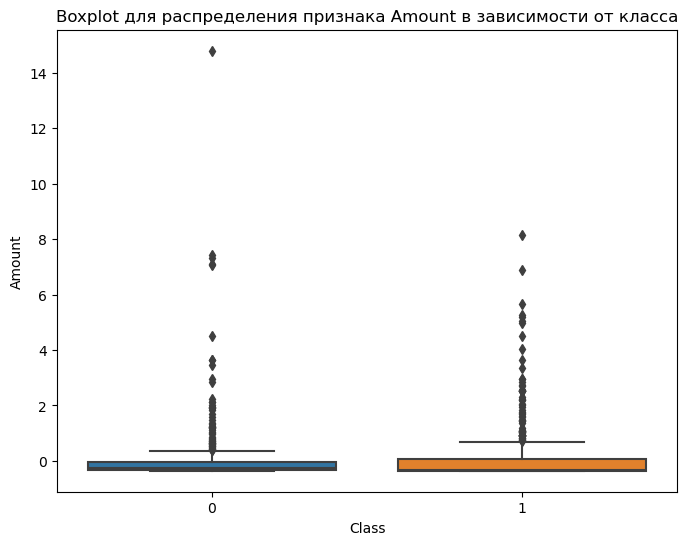

In [30]:
# Boxplot для визуализации выбросов в признаке `Amount`
plt.figure(figsize=(8, 6))
sns.boxplot(x='Class', y='Amount', data=data_balanced)
plt.title('Boxplot для распределения признака Amount в зависимости от класса')
plt.show()


# 3 step: Feature selection and construction of basic models

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

from sklearn.preprocessing import StandardScaler

# Определение признаков и целевой переменной
X = data_balanced.drop(['Class'], axis=1)  # Удаляем столбец с целевой переменной
y = data_balanced['Class']  # Целевая переменная (Class)

# Масштабирование данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Применяем масштабирование ко всем признакам

print("Масштабирование выполнено. Пример первых 5 строк масштабированных данных:")
print(X_scaled[:5, :])

# Создаем модель логистической регрессии с увеличенным числом итераций и другим алгоритмом оптимизации
model = LogisticRegression(solver='liblinear', max_iter=500)

# Применение RFE: оставляем 10 наиболее значимых признаков
rfe = RFE(model, n_features_to_select=10)
X_selected = rfe.fit_transform(X_scaled, y)

# Получаем названия выбранных признаков
selected_features = X.columns[rfe.get_support()]
print("Выбранные признаки с помощью RFE и логистической регрессии:", selected_features)


Масштабирование выполнено. Пример первых 5 строк масштабированных данных:
[[ 1.57689773  0.4349655  -0.24446618  0.59022786 -0.96368862  0.52958805
   0.08783934  0.62821346 -0.13093927  0.39220878  0.55156324 -0.4629729
   0.89142779  0.46670793  0.78659333 -1.1185414   0.64747442  0.40696967
   0.37214484  0.00604343 -0.1868361  -0.23429469 -0.48571003  0.03794764
  -0.63503988 -0.70499588  0.22455559  0.14317788  0.08223815 -0.40143151]
 [-0.53436821  0.65478131 -0.40022579  0.68682922 -0.47703366  0.1935893
  -0.34144288  0.48472857 -0.18567154  0.49804448  0.58845354 -0.50446302
   0.8899825   0.93707486  0.77213484  0.97949711  0.62365649  0.50120273
   0.11155768 -0.53758061 -0.24077275 -0.22380972 -0.58509595  0.20208549
   1.74779727  0.21949928  0.04413614 -0.14682249 -0.04068945 -0.37029882]
 [-0.98789714  0.37722618 -0.16951496  0.72032663 -0.75507631  0.46410249
   0.12438438  0.58376616 -0.11896092  0.40387723  0.49444741 -0.9951991
   0.58904151  0.18273582  0.64470079  

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

# Построение и обучение модели логистической регрессии на выбранных признаках
log_reg = LogisticRegression(solver='liblinear', max_iter=500)
log_reg.fit(X_train, y_train)

# Предсказание на тестовом наборе
y_pred = log_reg.predict(X_test)

# Оценка производительности модели
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
print(f"Точность модели на тестовом наборе: {accuracy:.4f}")
print(f"AUC-ROC: {roc_auc:.4f}")

# Подробный отчет о классификации
print("\nОтчет о классификации:")
print(classification_report(y_test, y_pred))

Точность модели на тестовом наборе: 0.9331
AUC-ROC: 0.9333

Отчет о классификации:
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       140
           1       0.95      0.92      0.93       144

    accuracy                           0.93       284
   macro avg       0.93      0.93      0.93       284
weighted avg       0.93      0.93      0.93       284



In [50]:
import pandas as pd

# Получаем коэффициенты признаков
coefficients = pd.DataFrame({"Признак": selected_features, "Коэффициент": log_reg.coef_[0]})
coefficients = coefficients.sort_values(by="Коэффициент", ascending=False)

print("\nКоэффициенты признаков в модели логистической регрессии:")
print(coefficients)



Коэффициенты признаков в модели логистической регрессии:
  Признак  Коэффициент
0      V4     1.967686
5     V11     0.737347
9  Amount     0.616389
8     V22     0.546882
1      V5     0.320810
2      V6    -0.864260
4     V10    -1.179419
3      V8    -1.283187
6     V12    -1.443881
7     V14    -2.382651


# 4 step: Comparison of Base Classification Models

In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

# Построение модели дерева решений
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

# Предсказание на тестовом наборе
y_pred_tree = tree_clf.predict(X_test)

# Оценка производительности модели
accuracy_tree = accuracy_score(y_test, y_pred_tree)
roc_auc_tree = roc_auc_score(y_test, y_pred_tree)
print(f"Точность модели дерева решений: {accuracy_tree:.4f}")
print(f"AUC-ROC: {roc_auc_tree:.4f}")

# Подробный отчет о классификации
print("\nОтчет о классификации для дерева решений:")
print(classification_report(y_test, y_pred_tree))


Точность модели дерева решений: 0.8944
AUC-ROC: 0.8938

Отчет о классификации для дерева решений:
              precision    recall  f1-score   support

           0       0.92      0.86      0.89       140
           1       0.87      0.93      0.90       144

    accuracy                           0.89       284
   macro avg       0.90      0.89      0.89       284
weighted avg       0.90      0.89      0.89       284



In [54]:
from sklearn.ensemble import RandomForestClassifier

# Построение модели случайного леса
forest_clf = RandomForestClassifier(random_state=42)
forest_clf.fit(X_train, y_train)

# Предсказание на тестовом наборе
y_pred_forest = forest_clf.predict(X_test)

# Оценка производительности модели
accuracy_forest = accuracy_score(y_test, y_pred_forest)
roc_auc_forest = roc_auc_score(y_test, y_pred_forest)
print(f"Точность модели случайного леса: {accuracy_forest:.4f}")
print(f"AUC-ROC: {roc_auc_forest:.4f}")

# Подробный отчет о классификации
print("\nОтчет о классификации для случайного леса:")
print(classification_report(y_test, y_pred_forest))


Точность модели случайного леса: 0.9366
AUC-ROC: 0.9368

Отчет о классификации для случайного леса:
              precision    recall  f1-score   support

           0       0.92      0.95      0.94       140
           1       0.95      0.92      0.94       144

    accuracy                           0.94       284
   macro avg       0.94      0.94      0.94       284
weighted avg       0.94      0.94      0.94       284



In [56]:
import pandas as pd

# Сравнение метрик между моделями
results = pd.DataFrame({
    "Модель": ["Логистическая регрессия", "Дерево решений", "Случайный лес"],
    "Точность": [accuracy, accuracy_tree, accuracy_forest],
    "AUC-ROC": [roc_auc, roc_auc_tree, roc_auc_forest]
})

print("\nСравнение производительности моделей:")
print(results)



Сравнение производительности моделей:
                    Модель  Точность   AUC-ROC
0  Логистическая регрессия  0.933099  0.933333
1           Дерево решений  0.894366  0.893849
2            Случайный лес  0.936620  0.936806


# 5 step: Logistic Regression Optimization

In [58]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Определение сетки параметров для логистической регрессии
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Инициализация логистической регрессии
log_reg = LogisticRegression(max_iter=500)

# Инициализация GridSearchCV
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Лучшая модель и параметры
print("Лучшие параметры:", grid_search.best_params_)
print("Лучший AUC-ROC:", grid_search.best_score_)

# Предсказание на тестовом наборе с лучшей моделью
best_log_reg = grid_search.best_estimator_
y_pred_best = best_log_reg.predict(X_test)

# Оценка производительности
accuracy_best = accuracy_score(y_test, y_pred_best)
roc_auc_best = roc_auc_score(y_test, y_pred_best)
print(f"Точность оптимизированной модели: {accuracy_best:.4f}")
print(f"AUC-ROC оптимизированной модели: {roc_auc_best:.4f}")


/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  

Лучшие параметры: {'C': 1, 'penalty': 'l2', 'solver': 'saga'}
Лучший AUC-ROC: 0.9821437630664225
Точность оптимизированной модели: 0.9401
AUC-ROC оптимизированной модели: 0.9403


/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


# 6 step: Advanced classification methods and their comparison with baseline models

In [60]:
from sklearn.neural_network import MLPClassifier

# Построение и обучение многослойного персептрона
mlp_clf = MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=500, random_state=42)
mlp_clf.fit(X_train, y_train)

# Предсказание на тестовом наборе
y_pred_mlp = mlp_clf.predict(X_test)

# Оценка производительности нейронной сети
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
roc_auc_mlp = roc_auc_score(y_test, y_pred_mlp)
print(f"Точность нейронной сети: {accuracy_mlp:.4f}")
print(f"AUC-ROC нейронной сети: {roc_auc_mlp:.4f}")


Точность нейронной сети: 0.9437
AUC-ROC нейронной сети: 0.9437


/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [71]:
from sklearn.svm import SVC

# Построение и обучение модели SVM с линейным ядром
svm_clf = SVC(kernel='linear', C=1, probability=True, random_state=42)
svm_clf.fit(X_train, y_train)

# Предсказание на тестовом наборе
y_pred_svm = svm_clf.predict(X_test)

# Оценка производительности модели SVM
accuracy_svm = accuracy_score(y_test, y_pred_svm)
roc_auc_svm = roc_auc_score(y_test, y_pred_svm)
print(f"Точность SVM: {accuracy_svm:.4f}")
print(f"AUC-ROC SVM: {roc_auc_svm:.4f}")


Точность SVM: 0.9437
AUC-ROC SVM: 0.9439


In [73]:
import pandas as pd

# Сравнение производительности между всеми моделями
results_extended = pd.DataFrame({
    "Модель": ["Логистическая регрессия (оптимизированная)", "Случайный лес", "SVM", "Нейронная сеть"],
    "Точность": [accuracy_best, accuracy_forest, accuracy_svm, accuracy_mlp],
    "AUC-ROC": [roc_auc_best, roc_auc_forest, roc_auc_svm, roc_auc_mlp]
})

print("\nСравнение производительности базовых и расширенных моделей:")
print(results_extended)



Сравнение производительности базовых и расширенных моделей:
                                       Модель  Точность   AUC-ROC
0  Логистическая регрессия (оптимизированная)  0.940141  0.940278
1                               Случайный лес  0.936620  0.936806
2                                         SVM  0.943662  0.943948
3                              Нейронная сеть  0.943662  0.943651
